<a href="https://colab.research.google.com/github/sumitkharayat/Linear-Regression/blob/main/Experiment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting Housing Prices: Develop a regression model to predict
house prices based on features like location, size, and amenities.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("Housing_Price_Dataset_120_Records.csv")


In [ ]:
df.columns



Index(['HouseID', 'Location', 'Area_sqft', 'Bedrooms', 'Bathrooms', 'Balcony',
       'Parking', 'Age_Years', 'Furnished', 'Price'],
      dtype='object')

In [ ]:
df.shape

(120, 10)

In [ ]:
df.head()

,HouseID,Location,Area_sqft,Bedrooms,Bathrooms,Balcony,Parking,Age_Years,Furnished,Price
0,H001,Rural,1028,1,3,0,0,5,Yes,55.84
1,H002,Rural,2316,1,4,0,0,3,Yes,103.88
2,H003,Urban,1834,1,2,2,2,23,No,86.42
3,H004,Urban,1719,3,1,0,2,14,No,96.77
4,H005,Suburban,1118,2,3,0,0,13,Yes,63.94


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn. linear_model import LinearRegression
from sklearn. preprocessing import OneHotEncoder


In [ ]:
X = df.drop(['HouseID', 'Price'], axis=1)
Y = df['Price']

In [ ]:
categorical_cols = ['Location', "Furnished"]
encoder = OneHotEncoder (handle_unknown='ignore', sparse_output=False)
X_encoded_cols = encoder.fit_transform(X[categorical_cols])
X_encoded_df = pd. DataFrame (
    X_encoded_cols,
columns=encoder. get_feature_names_out(categorical_cols),
    index=X.index
)
x = X.drop(columns=categorical_cols)
x = pd.concat([X, X_encoded_df], axis=1)
print ("shape of X after encoding:", X. shape)
print("InFirst 5 rows of X after encoding:")
display(x.head())

shape of X after encoding: (120, 8)
InFirst 5 rows of X after encoding:


,Location,Area_sqft,Bedrooms,Bathrooms,Balcony,Parking,Age_Years,Furnished,Location_Rural,Location_Suburban,Location_Urban,Furnished_No,Furnished_Yes
0,Rural,1028,1,3,0,0,5,Yes,1.0,0.0,0.0,0.0,1.0
1,Rural,2316,1,4,0,0,3,Yes,1.0,0.0,0.0,0.0,1.0
2,Urban,1834,1,2,2,2,23,No,0.0,0.0,1.0,1.0,0.0
3,Urban,1719,3,1,0,2,14,No,0.0,0.0,1.0,1.0,0.0
4,Suburban,1118,2,3,0,0,13,Yes,0.0,1.0,0.0,0.0,1.0


In [ ]:


X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.predict(X_test)

array([101.39,  66.9 ,  63.94,  60.96,  62.13,  58.67,  35.35,  66.31,
       102.29,  63.55,  74.89, 114.76, 131.89,  77.38,  63.54, 113.85,
        87.52,  55.84, 104.41,  61.74, 129.28,  95.59, 101.56, 115.42])

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

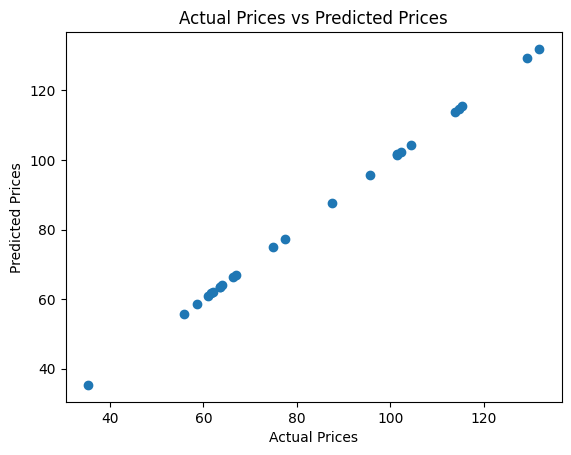

In [ ]:
plt.scatter(y_test, model.predict(X_test))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Squared Error:", mean_squared_error(y_test, model.predict(X_test)))
print("R-squared:", r2_score(y_test, model.predict(X_test)))


Mean Squared Error: 1.7481157659697622e-26
R-squared: 1.0


In [ ]:
import pickle

filename = "House_Price_Predictor.pkl"
pickle.dump(model, open(filename, "wb"))

print(f"Model saved successfully to {filename}")

Model saved successfully to House_Price_Predictor.pkl


In [ ]:
import pickle

with open("House_Price_Predictor.pkl", "rb") as f:
    model = pickle.load(f)

    print("Model loaded successfully")

Model loaded successfully


In [ ]:
import pickle

with open("House_Price_Predictor.pkl", "rb") as f:
    model = pickle.load(f)

    print("Model loaded successfully")

Model loaded successfully
